# Kernel PCA with polynomial kernel (d = 2,3)

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
import csv

#from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
import sklearn.metrics.pairwise

filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')

proj [-2162313.4172137    263121.14150229]
d is: 2


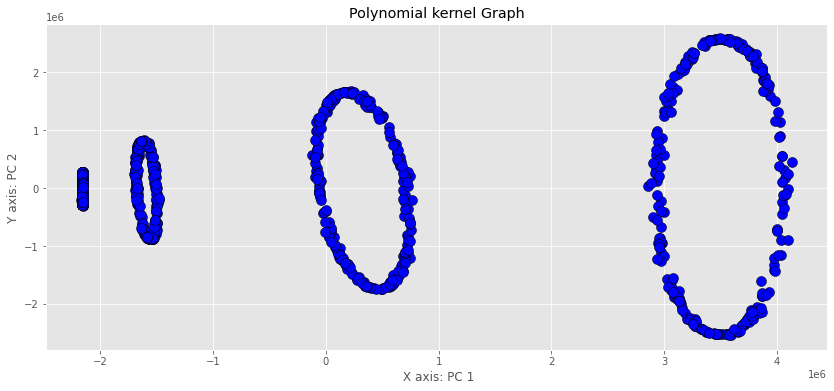

proj [-1.64320123e+11  9.16660678e+09]
d is: 3


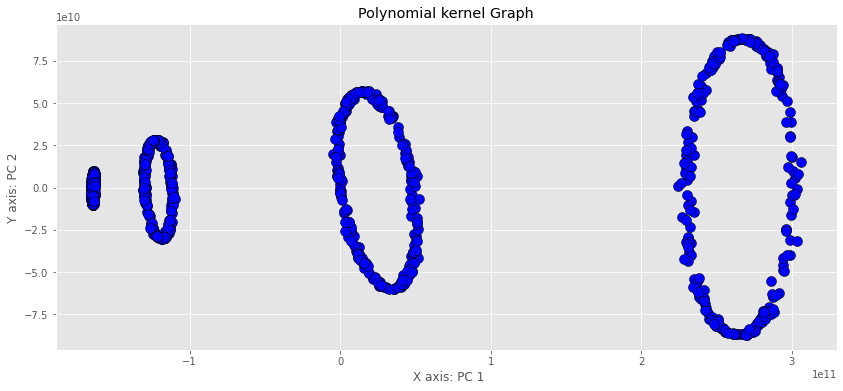

In [2]:
euclidean_distance = pdist(data, 'sqeuclidean')#computes pairwise euclidean distance betwwen the vectors
distance_matrix= squareform(euclidean_distance)

d = [2, 3]

for i in d:
    
    #K1 = sklearn.metrics.pairwise.polynomial_kernel(distance_matrix, degree=i, coef0=1)
    K = (1 + distance_matrix.transpose() @ distance_matrix)
    
    if i == 2:
        K = K @ K
    if i == 3:
        K = K @ K @ K

    #Centering the kernel matrix
    N = K.shape[0] # number of samples
    
    
    ones = np.ones((N,N)) / N
    K = K - ones @ K - K @ ones + ones @ K @ ones

    #Calculate eigenvalues and eigenvectors of kernel matrix
    n_components = 2
    eigenvals, eigenvecs = LA.eigh(K)
    eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]    
    # Collect the top k eigenvectors (projected examples)
    principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])

    #Normalization
    principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)

    #Project the data onto top 2 eigenvectors
    projected_data = np.dot(K , principal_components )
    print("proj", projected_data[0])
    
    with plt.style.context(('ggplot')):
        plt.figure(figsize=(14, 6))
        plt.scatter(projected_data[:,0], projected_data[:,1], s=100, facecolor = 'b', edgecolors='k')
        plt.xlabel(' X axis: PC 1')
        plt.ylabel('Y axis: PC 2')
        print('d is:', i)
        plt.title("Polynomial kernel Graph")
        plt.show()